# Nidhi Kamath 
BECO B-07
ML practial 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) 

In [8]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df.shape

(200000, 7)

In [10]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [12]:
df.dtypes


fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [13]:

df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [15]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
from math import *
def distance_transform(longitude1, latitude1, longitude2, latitude2):
 travel_dist = []
 
 for pos in range(len(longitude1)):
     long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
     dist_long = long2 - long1
     dist_lati = lati2 - lati1
     a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
     c = 2 * asin(sqrt(a))*6371
     travel_dist.append(c)
 
 return travel_dist

In [30]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
 df['pickup_latitude'].to_numpy(),
 df['dropoff_longitude'].to_numpy(),
 df['dropoff_latitude'].to_numpy()
 )

In [19]:
df = df.drop('pickup_datetime',axis=1)

In [20]:

df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


fare_amount             Axes(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     Axes(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         Axes(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    Axes(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        Axes(0.125,0.566951;0.352273x0.0920732)
passenger_count      Axes(0.547727,0.566951;0.352273x0.0920732)
dtype: object

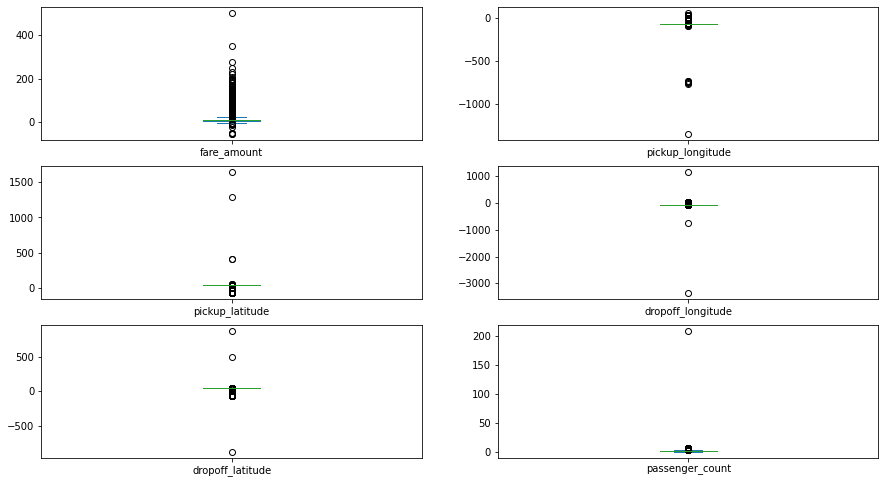

In [21]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [26]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
    def treat_outliers_all(df1 , col_list):
        for c in col_list:
            df1 = remove_outlier(df , c)
            return df1


In [27]:
df = treat_outliers_all(df , df.iloc[: , 0::])

NameError: name 'treat_outliers_all' is not defined

fare_amount             Axes(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     Axes(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         Axes(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    Axes(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        Axes(0.125,0.566951;0.352273x0.0920732)
passenger_count      Axes(0.547727,0.566951;0.352273x0.0920732)
dtype: object

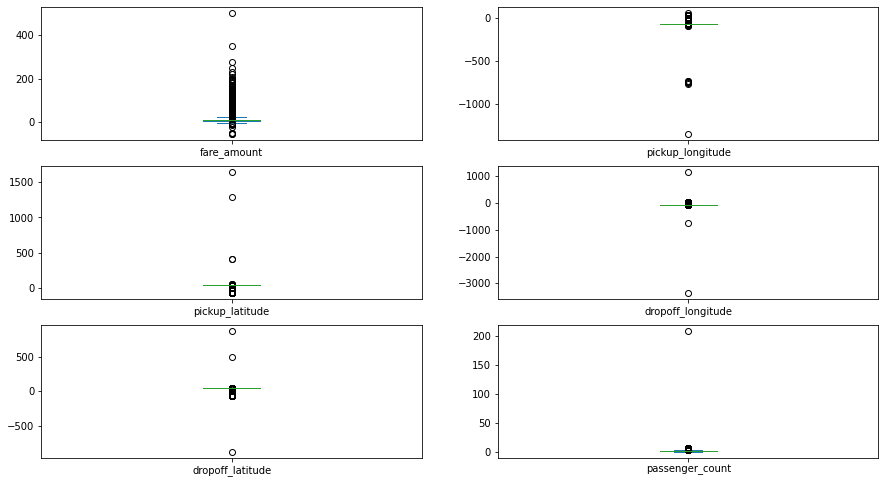

In [28]:

df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [31]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 7)


In [33]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
 (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
 (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
 (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
 ]

In [34]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

<Axes: >

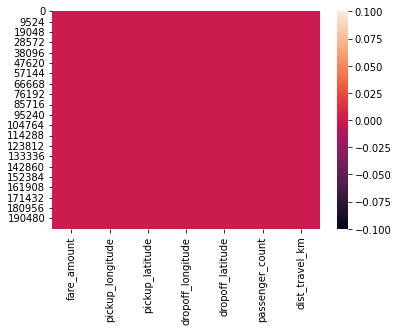

In [35]:
sns.heatmap(df.isnull())

In [36]:
corr = df.corr() 
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
fare_amount,1.000000,0.010457,-0.008481,0.008985,-0.011014,0.010150,0.024685
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414,0.105581
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560,-0.062436
dropoff_longitude,0.008985,0.833026,-0.774787,1.000000,-0.917010,0.000034,0.056717
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.079944
passenger_count,0.010150,-0.000414,-0.001560,0.000034,-0.000659,1.000000,-0.001473
dist_travel_km,0.024685,0.105581,-0.062436,0.056717,-0.079944,-0.001473,1.000000


<Axes: >

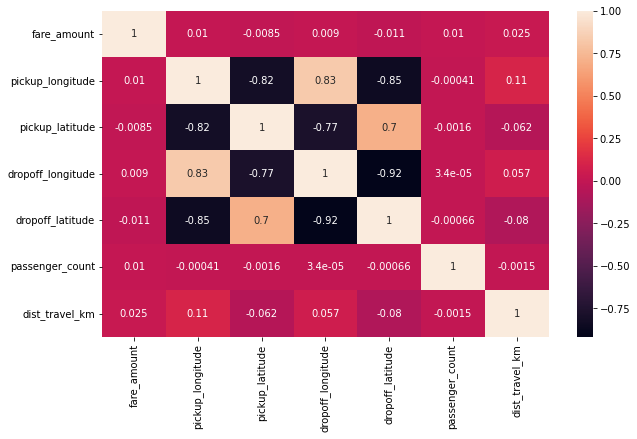

In [42]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

In [45]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]
y = df['fare_amount']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [50]:
regression.fit(X_train,y_train)

LinearRegression()

In [52]:
regression.intercept_

11.758235265352852

In [53]:
regression.coef_

array([-0.00327777, -0.00854931, -0.01332604, -0.03418361,  0.05475233])

In [54]:
prediction = regression.predict(X_test)

In [55]:
print(prediction)

[11.30175659 11.35531322 11.51754198 ... 11.29969913 11.29970312
 11.29968205]


In [56]:
y_test


159259    14.5
91052      7.0
168159     6.9
114165     7.0
11444     16.5
          ... 
99963     10.0
174405    26.1
183005     7.1
168865     3.3
17144      3.7
Name: fare_amount, Length: 66000, dtype: float64

In [57]:
from sklearn.metrics import r2_score

r2_score(y_test,prediction)


0.0002736619369629878

In [58]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
MSE

99.35480086579409

In [59]:
RMSE = np.sqrt(MSE)
RMSE

9.967687839503908

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction
rf.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
y_pred = rf.predict(X_test)
y_pred

array([16.035,  6.236,  8.92 , ...,  7.523,  6.594,  6.768])

In [62]:
Random = r2_score(y_test,y_pred)

In [63]:
Random


0.7492497783059164

In [64]:
MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random

24.920058014814952